In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read data into a pandas DataFrame

In [3]:
baseball_df = pd.read_csv('data/pitches.csv')

In [4]:
baseball_df = baseball_df.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [5]:
baseball_df.columns
baseball_df

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,horzbreak,inducedvertbreak,platelocside,platelocheight,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,7.899302,20.196724,-0.925614,3.118610,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,3.684525,20.294086,-0.000916,1.945728,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,7.670026,18.184725,-1.969467,3.548406,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,7.343168,19.395239,-1.160865,2.435223,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,5.351965,17.362413,0.046086,2.654030,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706904,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,4,9.0,1,1.0,2.0,...,2.049364,18.104872,0.719018,2.699417,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
706905,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,81,5,9.0,1,1.0,2.0,...,-4.902229,-20.987835,0.399907,1.736541,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
706906,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,1,9.0,1,0.0,0.0,...,0.660327,19.385929,0.487332,2.043276,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park
706907,2021/10/03/bosmlb-wasmlb-1,2021-10-03 19:05:00,2021-10-03,19:05:00,82,2,9.0,1,0.0,1.0,...,0.548382,20.448322,0.333695,3.081872,120,Washington Nationals,111,Boston Red Sox,3309,Nationals Park


In [6]:
# How many games are there? 
# Seeing when we go from a number that's not one to one (signifies the start of a game)
baseball_df['game_start'] = (baseball_df['ab'] == 1) & (baseball_df['ab'].shift(1) != 1)

# make a new game number col, using cumsum to count
baseball_df['game_number'] = baseball_df['game_start'].cumsum()

# Display the dataframe

num_games = max(baseball_df['game_number'].unique())



## Merging Baseball DF & saving as pkl to use in other files

In [7]:
score_df = pd.read_csv('data/gamescore_by_gameid_ab/gameid_ab_score_21.csv')

# Merge the dataframes together
baseball_df = baseball_df.merge(score_df[["gameid", "ab", "visscore", "homscore"]], 
                                on=["gameid", "ab"], 
                                how="left")

baseball_df.head(30)

,gameid,GameDate,Date,Time,ab,pitchnum,inning,teambat,balls,strikes,...,hometeam_id,Home,awayteam_id,Visitor,venue_id,venue_name,game_start,game_number,visscore,homscore
0,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,1,1.0,0,0.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,True,1,0.0,0.0
1,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,2,1.0,0,1.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
2,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,3,1.0,0,1.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
3,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,4,1.0,0,2.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
4,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,5,1.0,0,3.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
5,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,1,6,1.0,0,3.0,2.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
6,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,2,1,1.0,0,0.0,0.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
7,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,2,2,1.0,0,0.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
8,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,2,3,1.0,0,1.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0
9,2021/04/01/pitmlb-chnmlb-1,2021-04-01 13:20:00,2021-04-01,13:20:00,2,4,1.0,0,2.0,1.0,...,112,Chicago Cubs,134,Pittsburgh Pirates,17,Wrigley Field,False,1,0.0,0.0


In [8]:
baseball_df.to_pickle('data/baseball_data.pkl')

In [9]:
num_games

2253

In [10]:
baseball_df = baseball_df[['GameDate', 'Date', 'Time', 'ab', 'pitchnum', 'inning',
       'teambat', 'balls', 'strikes', 'outs', 'pitcher', 'pitcherthrows',
       'batter', 'batterside', 'pitchresult', 'pitchresult_desc', 'eventtype',
       'pitchname', 'pitchname_desc', 'spinrate', 'relspeed', 'horzbreak',
       'inducedvertbreak', 'platelocside', 'platelocheight', 'hometeam_id',
       'Home', 'awayteam_id', 'Visitor', 'venue_id', 'venue_name']].copy()

# We need to figure out what we care about 

In [11]:
baseball_subset = baseball_df[['Date', 'Time', 'pitcher', 'ab', 'pitchnum', 'pitchname', 'pitchresult','eventtype', 'Home','Visitor']].copy()


In [12]:
baseball_subset

,Date,Time,pitcher,ab,pitchnum,pitchname,pitchresult,eventtype,Home,Visitor
0,2021-04-01,13:20:00,"Hendricks, Kyle",1,1,FF,B,ball,Chicago Cubs,Pittsburgh Pirates
1,2021-04-01,13:20:00,"Hendricks, Kyle",1,2,FF,F,foul,Chicago Cubs,Pittsburgh Pirates
2,2021-04-01,13:20:00,"Hendricks, Kyle",1,3,FF,B,ball,Chicago Cubs,Pittsburgh Pirates
3,2021-04-01,13:20:00,"Hendricks, Kyle",1,4,FF,B,ball,Chicago Cubs,Pittsburgh Pirates
4,2021-04-01,13:20:00,"Hendricks, Kyle",1,5,FF,F,foul,Chicago Cubs,Pittsburgh Pirates
...,...,...,...,...,...,...,...,...,...,...
706904,2021-10-03,19:05:00,"Pivetta, Nick",81,4,FF,F,foul,Washington Nationals,Boston Red Sox
706905,2021-10-03,19:05:00,"Pivetta, Nick",81,5,KC,X,field_out,Washington Nationals,Boston Red Sox
706906,2021-10-03,19:05:00,"Pivetta, Nick",82,1,FF,C,called_strike,Washington Nationals,Boston Red Sox
706907,2021-10-03,19:05:00,"Pivetta, Nick",82,2,FF,F,foul,Washington Nationals,Boston Red Sox


In [13]:
baseball_subset['pitcher'].nunique() 

907

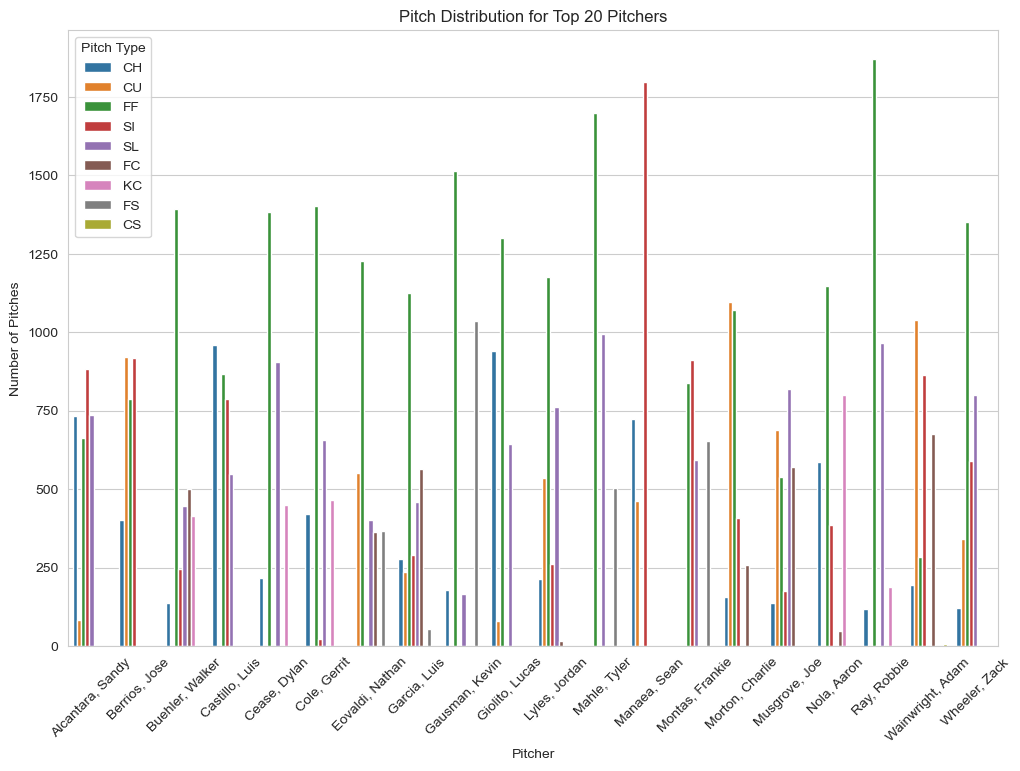

In [14]:
# Find the top 20 pitchers with the most pitches thrown
top_pitchers = baseball_subset['pitcher'].value_counts().head(20).index
filtered_df = baseball_subset[baseball_subset['pitcher'].isin(top_pitchers)]

# Group and count the filtered data
pitch_distribution = filtered_df.groupby(['pitcher', 'pitchname']).size().reset_index(name='counts')

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='pitcher', y='counts', hue='pitchname', data=pitch_distribution)
plt.title('Pitch Distribution for Top 20 Pitchers')
plt.xlabel('Pitcher')
plt.ylabel('Number of Pitches')
plt.xticks(rotation=45)
plt.legend(title='Pitch Type')
plt.show()

## Show all the pitches together 

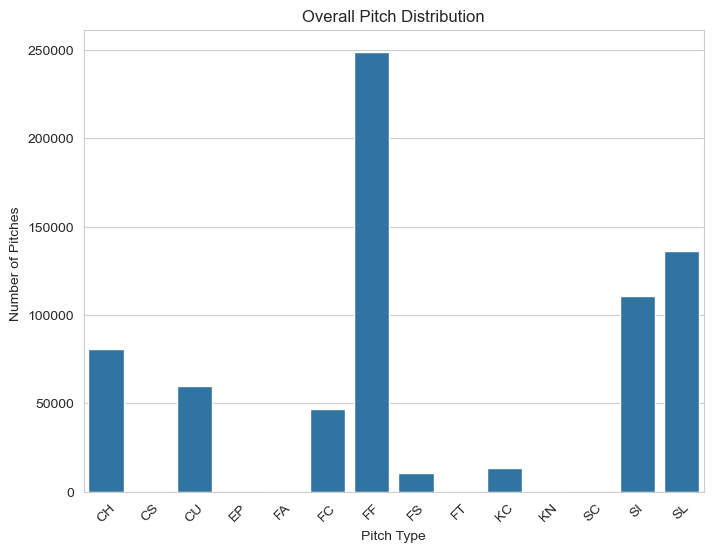

In [15]:
pitch_aggregate = baseball_subset.groupby('pitchname').size().reset_index(name='counts')

plt.figure(figsize=(8, 6))
sns.barplot(x='pitchname', y='counts', data=pitch_aggregate)
plt.title('Overall Pitch Distribution')
plt.xlabel('Pitch Type')
plt.ylabel('Number of Pitches ')
plt.xticks(rotation=45)
plt.show()


In [16]:
baseball_subset['pitchname'].value_counts()

pitchname
FF    248968
SL    136068
SI    110444
CH     80621
CU     59540
FC     46567
KC     13544
FS     10364
FA       425
CS       175
FT        90
KN        58
EP        43
SC         1
Name: count, dtype: int64

## Grouping stuff and trying to track pitch changes

In [17]:
grouped_baseball_df = baseball_df[["pitcher", "pitchname", "pitchname_desc", "pitchresult", "pitchresult_desc", "game_start", "game_number"]].copy()

grouped_baseball_df

KeyError: "['game_start', 'game_number'] not in index"

In [ ]:
random_game_numbers = grouped_baseball_df["game_number"].drop_duplicates().sample(n=20, random_state=321).tolist()

random_game_numbers = np.array((random_game_numbers))

In [ ]:
grouped_baseball_df = grouped_baseball_df[grouped_baseball_df["game_number"].isin(random_game_numbers)].copy()

In [ ]:
grouped_baseball_df.head()

In [ ]:
# this is how I'm going to select the game number I want to filter through 
num = 11

In [ ]:
# Filter the dataframe for game_number 11
game_eleven = grouped_baseball_df[grouped_baseball_df["game_number"] == num].copy()

# Compare each pitchname with the previous one to detect changes
pitch_change_count = (game_eleven["pitchname"] != game_eleven["pitchname"].shift(1)).sum()

# Display the result
pitch_change_count

## A series of functions to help me do logistic regression 

In [ ]:
good_results = ["C", "R", "F", "S", "X", "L", "W", "T", "M", "O"] # Just strikes and bad things for the batters 
# X = Hit into play (Oot) at the end of the day the batter is out so I'm counting it as a win

bad_results = ["B", "D", "E", "*B", "D", "H", "P" ] # just balls and batters crushing it 

In [ ]:
def calculate_pitch_changes(df):
    # Initialize an empty dictionary
    pitch_change_dict = {}

    # Get unique combinations of pitcher and game_number
    unique_games = df[["pitcher", "game_number"]].drop_duplicates()

    # Loop through each unique game
    for index, row in unique_games.iterrows():
        pitcher = row["pitcher"]
        game_number = row["game_number"]
        
        # Filter the dataframe for the specific game
        game_df = df[(df["pitcher"] == pitcher) & (df["game_number"] == game_number)].copy()

        # Compare each pitchname with the previous one to detect changes
        pitch_change_count = (game_df["pitchname"] != game_df["pitchname"].shift(1)).sum()

        # Store the result in the dictionary
        pitch_change_dict[(pitcher, game_number)] = pitch_change_count

    return pitch_change_dict

pitch_changes = calculate_pitch_changes(grouped_baseball_df)


In [ ]:
pitch_changes

In [ ]:
def categorize_pitch_result(row):
    if row["pitchresult"] in good_results:
        return "good"
    elif row["pitchresult"] in bad_results:
        return "bad"
    return "neutral"

# Apply the categorization
grouped_baseball_df["result_category"] = grouped_baseball_df.apply(categorize_pitch_result, axis=1)

In [ ]:
def calculate_pitch_changes_with_outcomes(df):
    # Initialize an empty list to store results
    results = []

    # Get unique combinations of pitcher & game_number
    unique_games = df[["pitcher", "game_number"]].drop_duplicates()

    # Loop through each *unique* game
    for index, row in unique_games.iterrows():
        pitcher = row["pitcher"]
        game_number = row["game_number"]
        
        # Filter the df for the specific game
        game_df = df[(df["pitcher"] == pitcher) & (df["game_number"] == game_number)].copy()

        # Compare each pitchname with the previous one to detect changes
        pitch_change_count = (game_df["pitchname"] != game_df["pitchname"].shift(1)).sum()

        # Count good and bad results in the game
        good_outcomes = (game_df["result_category"] == "good").sum()
        bad_outcomes = (game_df["result_category"] == "bad").sum()

        # Append the results for game to the list
        results.append({
            "pitcher": pitcher,
            "game_number": game_number,
            "pitch_change_count": pitch_change_count,
            "good_outcomes": good_outcomes,
            "bad_outcomes": bad_outcomes
        })

    return pd.DataFrame(results)

# Apply the function to get the pitch changes and outcomes
pitch_changes_outcomes_df = calculate_pitch_changes_with_outcomes(grouped_baseball_df)

pitch_changes_outcomes_df.head()


In [ ]:
from sklearn.linear_model import LogisticRegression

# Define X (independent variable) and y (dependent variable)
X = pitch_changes_outcomes_df["pitch_change_count"].values.reshape(-1, 1)
y = (pitch_changes_outcomes_df["good_outcomes"] > pitch_changes_outcomes_df["bad_outcomes"]).astype(int)  # 1 if more good outcomes, 0 otherwise

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)

# Check the coefficient to see the relationship
print("Coefficient for pitch changes:", model.coef_)
print("Intercept:", model.intercept_)


In [ ]:
# I'm redoing the Logistic Regression here 
X = pitch_changes_outcomes_df["pitch_change_count"].values.reshape(-1, 1)
y = (pitch_changes_outcomes_df["good_outcomes"] > pitch_changes_outcomes_df["bad_outcomes"]).astype(int)

# Fit logistic regression
model = LogisticRegression()
model.fit(X, y)
# ------------------------------------

# Create an array of values for pitch changes to plot against
X_test = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

# Predict probabilities using the logistic regression model
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of more good outcomes

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual outcomes (0 = bad, 1 = good)', alpha=0.5)
plt.plot(X_test, y_prob, color='red', label='Predicted probability of good outcomes')

plt.xlabel('Pitch Change Count')
plt.ylabel('Probability of Good Outcomes')
plt.title('Logistic Regression: Probability of Good Outcomes vs. Pitch Changes')
plt.legend()
plt.grid(True)
plt.show()
